## Churn Model -  Artifical Neural Networks

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [49]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are total 14 columns(features) with 14th feature as Exited.

The columns RowNumber, CustomerID, Surname are not nesseary for our perdection.

In [34]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [35]:
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No Null Values found in Dataset.

In [36]:
dataset.Exited.value_counts().reset_index()

,index,Exited
0,0,7963
1,1,2037


Total 7693 customers have not left the bank,
where are 2037 customer have left.

In [37]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Dropping columns CustomerID, RowNumber, Surname 

In [39]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### EDA of Churn dataset

In [40]:
dataset[['Geography','Gender','Exited']].groupby(['Geography','Gender']).agg(['mean','count'])

Exited      
                      mean count
Geography Gender                
France    Female  0.203450  2261
          Male    0.127134  2753
Germany   Female  0.375524  1193
          Male    0.278116  1316
Spain     Female  0.212121  1089
          Male    0.131124  1388

We have total for three countires : France, Germany and Spain

In [46]:
geoprahy=pd.get_dummies(dataset.Geography,drop_first=True)
gender=pd.get_dummies(dataset.Gender,drop_first=True)

In [50]:
X=pd.concat([X,geoprahy,gender],axis=1)

In [51]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [52]:
X.drop(['Geography','Gender'],axis=1,inplace=True)

##### Importing libraries

In [53]:
# IMporting train test split
from sklearn.model_selection import train_test_split

In [54]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [55]:
# Feature Scaling to scale the data present in the dataset
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

In [56]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Neural Network

In [96]:
# Keras library 

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [74]:
# Creating Sequentails model
classifier=Sequential()

# First Input Layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim = 11))

# Second Hidden Layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

# Third Hidden Layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the layer with adamax and binary_crossentropy
classifier.compile(optimizer="adamax",loss="binary_crossentropy",metrics=['accuracy'])

In [75]:
# Printing the summary.
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 6)                 72        
                                                                 
 dense_11 (Dense)            (None, 6)                 42        
                                                                 
 dense_12 (Dense)            (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


There are total of three layers, 

In [78]:
model=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.6711 - accuracy: 0.7957 - val_loss: 0.6112 - val_accuracy: 0.7952
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5706 - accuracy: 0.7964 - val_loss: 0.5456 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5233 - accuracy: 0.7962 - val_loss: 0.5113 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4965 - accuracy: 0.7962 - val_loss: 0.4920 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4796 - accuracy: 0.7962 - val_loss: 0.4793 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4676 - accuracy: 0.7962 - val_loss: 0.4699 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4586 - accuracy: 0.7962 - val_loss: 0.4630 - val_accuracy: 0.7955

Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4009 - accuracy: 0.8377 - val_loss: 0.4152 - val_accuracy: 0.8217
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4006 - accuracy: 0.8375 - val_loss: 0.4148 - val_accuracy: 0.8217
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4001 - accuracy: 0.8371 - val_loss: 0.4146 - val_accuracy: 0.8220
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3999 - accuracy: 0.8369 - val_loss: 0.4144 - val_accuracy: 0.8236
Epoch 62/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3995 - accuracy: 0.8373 - val_loss: 0.4142 - val_accuracy: 0.8228
Epoch 63/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3992 - accuracy: 0.8377 - val_loss: 0.4140 - val_accuracy: 0.8228
Epoch 64/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3989 - accuracy: 0.8384 - val_loss: 0.4138 - val_accuracy:

In [79]:
# Predection
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [83]:
#Confustion matrix
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pred)
print(matrix)

[[1541   54]
 [ 254  151]]


In [85]:
# Calculate accuracy score

from sklearn.metrics import accuracy_score

score=accuracy_score(y_pred,y_test)
print(score)

0.846


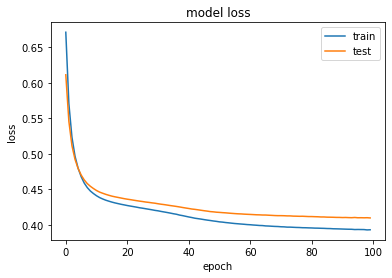

In [89]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])#, loc='upper left')
plt.show()

Plotting the graph difference between train and test loss validation.

### Artifical Neural Network - Changing values


Adding one more hidden layer, increasing units in hidden layer.

Input units = 10
Kernal_Initilizer = he_normal


In [98]:
# Creating new Sequential model.
Seq=Sequential()

# Input Layer
Seq.add(Dense(units=10,kernel_initializer='he_normal',activation='relu',input_dim = 11))

# First hidden layer
Seq.add(Dense(units = 20, kernel_initializer = 'he_normal',activation='relu'))

#Second hidden layer
Seq.add(Dense(units = 15, kernel_initializer = 'he_normal',activation='relu'))

# Output Layer
Seq.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the model with optimizer adam, binary_crossentropy for classification.
Seq.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

# Running the model
Model=Seq.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)



Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.4831 - accuracy: 0.7964 - val_loss: 0.4453 - val_accuracy: 0.8061
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4277 - accuracy: 0.8145 - val_loss: 0.4165 - val_accuracy: 0.8254
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3991 - accuracy: 0.8300 - val_loss: 0.4065 - val_accuracy: 0.8175
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3823 - accuracy: 0.8378 - val_loss: 0.3910 - val_accuracy: 0.8383
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3662 - accuracy: 0.8449 - val_loss: 0.3845 - val_accuracy: 0.8266
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3546 - accuracy: 0.8535 - val_loss: 0.3735 - val_accuracy: 0.8383
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3457 - accuracy: 0.8584 - val_loss: 0.3696 - val_accuracy: 0.8440

Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3027 - accuracy: 0.8763 - val_loss: 0.3716 - val_accuracy: 0.8512
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3026 - accuracy: 0.8731 - val_loss: 0.3718 - val_accuracy: 0.8504
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3025 - accuracy: 0.8746 - val_loss: 0.3785 - val_accuracy: 0.8508
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3021 - accuracy: 0.8767 - val_loss: 0.3762 - val_accuracy: 0.8436
Epoch 62/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3019 - accuracy: 0.8748 - val_loss: 0.3779 - val_accuracy: 0.8482
Epoch 63/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3008 - accuracy: 0.8767 - val_loss: 0.3732 - val_accuracy: 0.8493
Epoch 64/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3006 - accuracy: 0.8768 - val_loss: 0.3732 - val_accuracy:

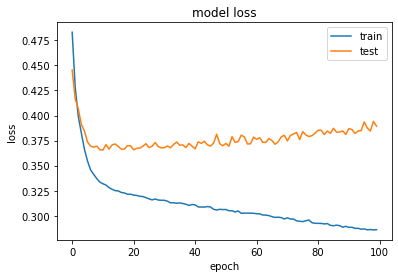

In [99]:
plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])#, loc='upper left')
plt.show()

Plotting graph with new values, large distortion between train validation and test validation.

AttributeError: 'History' object has no attribute 'fit'